<a href="https://colab.research.google.com/github/kenltho2/scratch-work/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

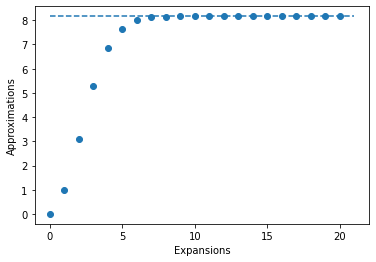

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


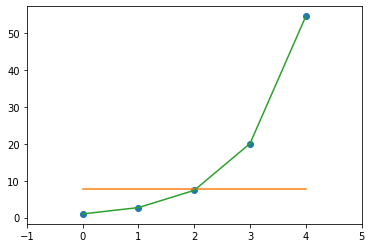

In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.dtypes.dtypes import ExtensionDtype


def TrueError(true_value, approx_value):
    terror = true_value - approx_value
    return terror

def relativeTrueError(TrueError, true_value):
    rterror = TrueError / true_value
    return rterror

def ApproxError (current_approx, previous_approx):
    if previous_approx == '' :
      return 'None'
    else:
      aerror = current_approx - previous_approx
    return aerror

def relativeApproxError(ApproxError, current_approx):
    if current_approx == 0:
      return 'None'
    else:
      raerror = ApproxError / current_approx
      return raerror

def e_to_the_x(x,y):
  e_approximation = 0
  for i in range(y):
    e_approximation += x**i / math.factorial(i)
  return e_approximation

def T_e_to_the_x(i):
  return math.exp(i)

def tablevalue(x,n):
  for i in range(n):
    return math.exp(x)

def TrueError_func(x,n):
  for i in range(n):
   return TrueError(T_e_to_the_x(x),e_to_the_x(x,i))
    
def relativeTrueError_func(x,n):
  for i in range(n):    
    return relativeTrueError(TrueError(T_e_to_the_x(2),e_to_the_x(x,i)),T_e_to_the_x(2))

def ApproxError_func(x,n):
  for i in range(n):
    if i > 1:
      return ApproxError(e_to_the_x(x,i), e_to_the_x(x, i-1))
    else:
      return 'None'

def relativeApproxError_func(x,n):
  for i in range(n):
    if i >= 1:
      return relativeApproxError(ApproxError(e_to_the_x(x,i), e_to_the_x(x, i-1)),e_to_the_x(x,i))
    else:
      return 'None'

df = pd.DataFrame(columns = ['Expansion','e^x approximation','e^x value', 'True Error', 'Relative True Error', 'Approximate Error', 'Relative Approximate Error'])
for i in range(1,21):
 df = df.append({'Expansion': [i],
             'e^x approximation': [e_to_the_x(2.1,i)],
             'e^x value': [tablevalue(2.1,i)],
             'True Error' : [TrueError(T_e_to_the_x(2.1),e_to_the_x(2.1,i))],
             'Relative True Error' : [relativeTrueError(TrueError(T_e_to_the_x(2.1),e_to_the_x(2.1,i)),T_e_to_the_x(2.1))],
             'Approximate Error': [ApproxError(e_to_the_x(2.1,i), e_to_the_x(2.1, i-1))],
             'Relative Approximate Error': [relativeApproxError(ApproxError(e_to_the_x(2.1,i), e_to_the_x(2.1, i-1)),e_to_the_x(2.1,i))]}, ignore_index=True)

df.drop(index = 0)
expansion = np.array(0)
for i in range(1,21):
  expansion = np.append(expansion,i)

ex = np.array(0)
for i in range(1,21):
  ex = np.append(ex,e_to_the_x(2.1,i))

calc = np.array(math.exp(2.1))
for i in range(0,21):
  calc = np.append(calc, T_e_to_the_x(2.1))

%matplotlib inline
plt.xlabel('Expansions')
plt.ylabel('Approximations')
plt.plot(calc, linestyle = 'dashed')
plt.scatter(expansion,ex)
plt.show()

%matplotlib inline
x = np.array(0)
for i in range(1,5):
  x = np.append(x, i)

y = np.array(math.exp(0))
for i in range(1,5):
  y = np.append(y, math.exp(i))

e_approx = np.array(e_to_the_x(2.1,5))
for  i in range(1,5):
  e_approx = np.append(e_approx, e_to_the_x(2.1,5))

coefficients = np.polyfit(x, e_approx, 5)

poly = np.poly1d(coefficients)

new_x = np.linspace(x[0],x[-1])

new_y = poly(new_x)

plt.plot(x,y, "o", new_x, new_y)
plt.xlim(x[0]-1,x[-1]+1)
plt.plot(x,y)

plt.show()
